In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/Users/oyuk/Documents/dev/python_machine_learning/python_machine_learning_book_2nd_edition/code/ch02/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values

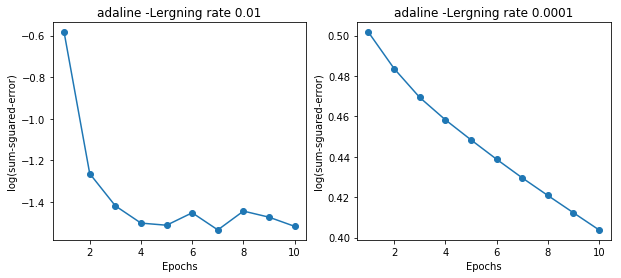

In [2]:
from adaline_gd import AdalineGD
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(sum-sguared-error)')
ax[0].set_title('adaline -Lergning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_,marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(sum-sguared-error)')
ax[1].set_title('adaline -Lergning rate 0.0001')
plt.show()

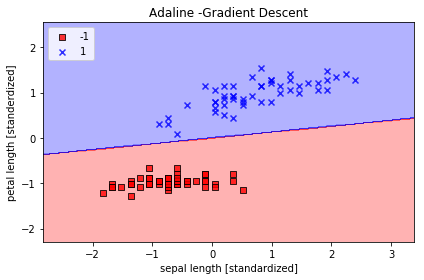

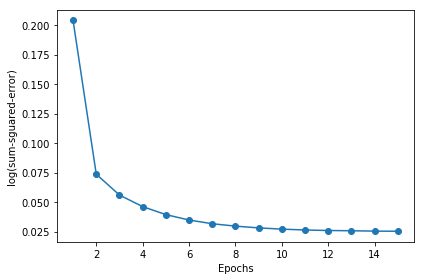

In [3]:
from plot_decision_regions import plot_decision_regions
X_std = np.copy(X)
X_std[:, 0] =( X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] =( X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline -Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standerdized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada.cost_)+1), ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(sum-sguared-error)')
plt.tight_layout()
plt.show()